In [ ]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"flight_price.csv")
original_df=df.copy()
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
### In order to more accurate memory usage , u can leverage memory_usage="deep" in info()
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.7 MB


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.shape

(10683, 11)

In [ ]:
#simpleimputer
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.read_csv("flight_price.csv")
print("Missing values before imputation:")
print(df.isnull().sum())

df.replace("nan", np.nan, inplace=True)
imputer = SimpleImputer(strategy='most_frequent')
df[['Total_Stops', 'Route']] = imputer.fit_transform(df[['Total_Stops', 'Route']])

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values before imputation:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
Missing values after imputation:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y")


df["Journey_day"] = df["Date_of_Journey"].dt.day
df["Journey_month"] = df["Date_of_Journey"].dt.month

df.drop(columns=["Date_of_Journey"], inplace=True)

df.head(3)


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


In [ ]:
# Convert 'Dep_Time' and 'Arrival_Time' to datetime and extract features
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


df.drop(columns=["Dep_Time", "Arrival_Time"], inplace=True)

df.head(3)


<ipython-input-10-e5de6c4d1454>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
<ipython-input-10-e5de6c4d1454>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute
<ipython-input-10-e5de6c4d1454>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
<ipython-input-10-e5de6c4d1454>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure pa

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25


In [ ]:
df["Duration"] = df["Duration"].str.replace("h", " h").str.replace("m", " m")

df["Duration_hours"] = df["Duration"].str.extract(r"(\d+) h").fillna(0).astype(int)
df["Duration_mins"] = df["Duration"].str.extract(r"(\d+) m").fillna(0).astype(int)

df.drop(columns=["Duration"], inplace=True)

df.head(2)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Airline"] = le.fit_transform(df["Airline"])

df.head(2)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,3,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [ ]:
df = pd.get_dummies(df, columns=["Source"], drop_first=True)

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

df.head(2)


,Airline,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,0,0
1,1,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,0,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Destination'].replace('New Delhi', 'Delhi', inplace=True)

le = LabelEncoder()
df['Destination'] = le.fit_transform(df['Destination'])

df.head(2)


<ipython-input-14-0eb10378650f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Destination'].replace('New Delhi', 'Delhi', inplace=True)


,Airline,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,0,0
1,1,0,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,0,0,1,0


In [ ]:
# Convert 'Total_Stops' to numeric
df["Total_Stops"] = df["Total_Stops"].map({
    "non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4
}).fillna(0).astype(int)

df.drop(["Route", "Additional_Info"], axis=1, inplace=True)

df.head()


,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,0,0,0,0
1,1,0,2,7662,1,5,5,50,13,15,7,25,0,0,1,0
2,4,1,2,13882,9,6,9,25,4,25,19,0,0,1,0,0
3,3,0,1,6218,12,5,18,5,23,30,5,25,0,0,1,0
4,3,2,1,13302,1,3,16,50,21,35,4,45,0,0,0,0


In [ ]:
df.shape

(10683, 16)

In [ ]:
print(df.dtypes)


Airline           int64
Destination       int64
Total_Stops       int64
Price             int64
Journey_day       int32
Journey_month     int32
Dep_hour          int32
Dep_minute        int32
Arrival_hour      int32
Arrival_minute    int32
Duration_hours    int64
Duration_mins     int64
Source_Chennai    int64
Source_Delhi      int64
Source_Kolkata    int64
Source_Mumbai     int64
dtype: object


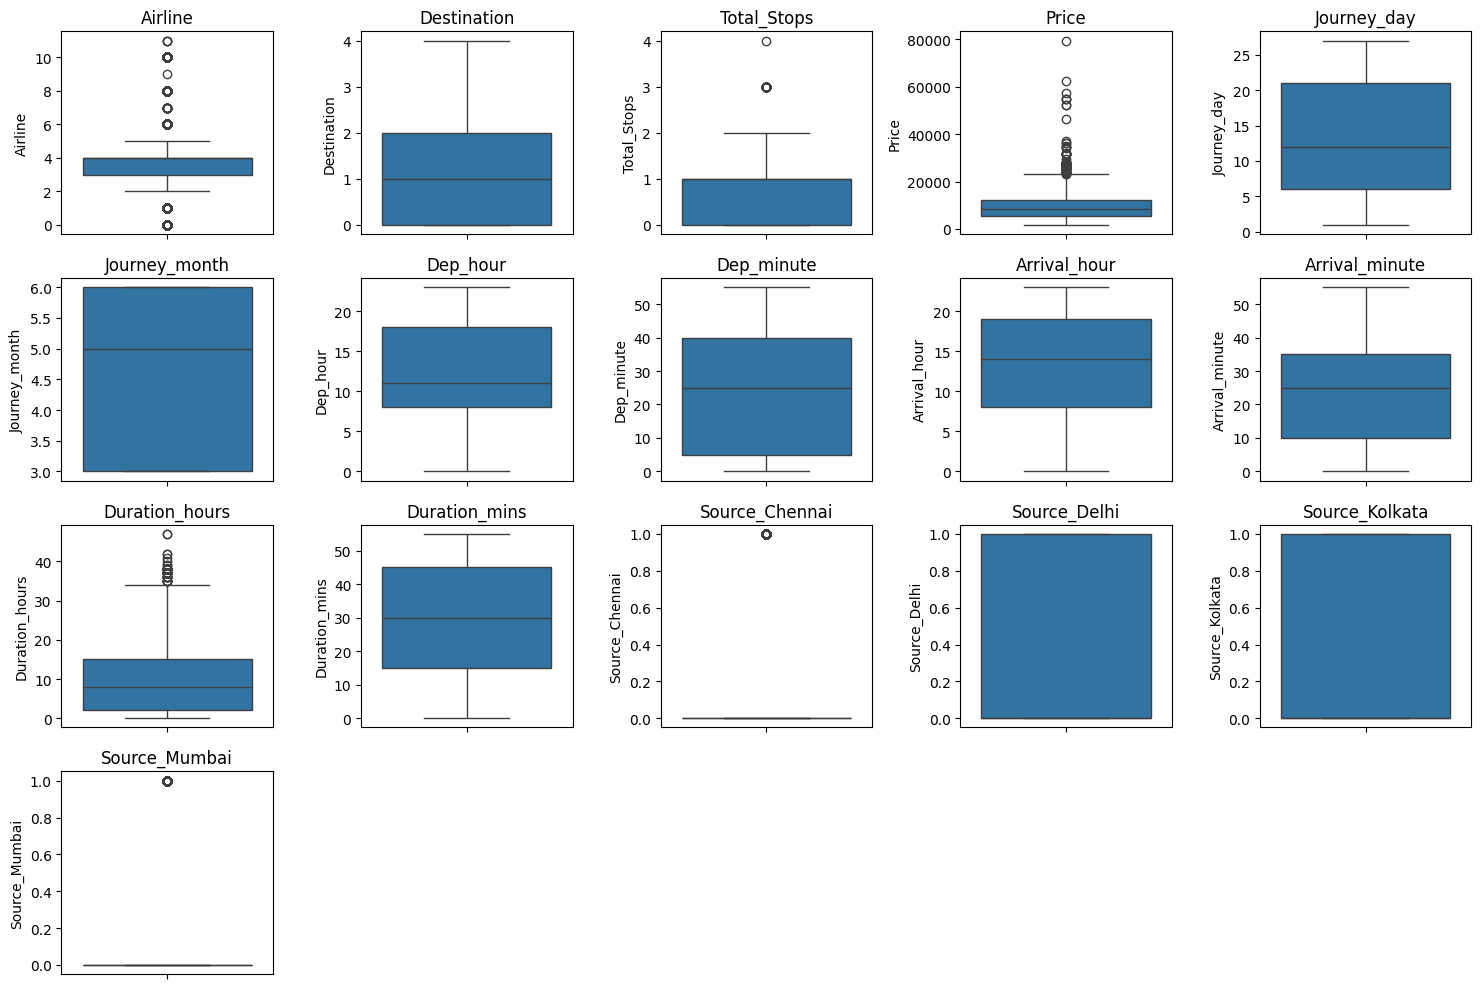


🔍 Outliers Count Per Column:
 Airline           4581
Destination          0
Total_Stops         46
Price               94
Journey_day          0
Journey_month        0
Dep_hour             0
Dep_minute           0
Arrival_hour         0
Arrival_minute       0
Duration_hours      73
Duration_mins        0
Source_Chennai     381
Source_Delhi         0
Source_Kolkata       0
Source_Mumbai      697
dtype: int64


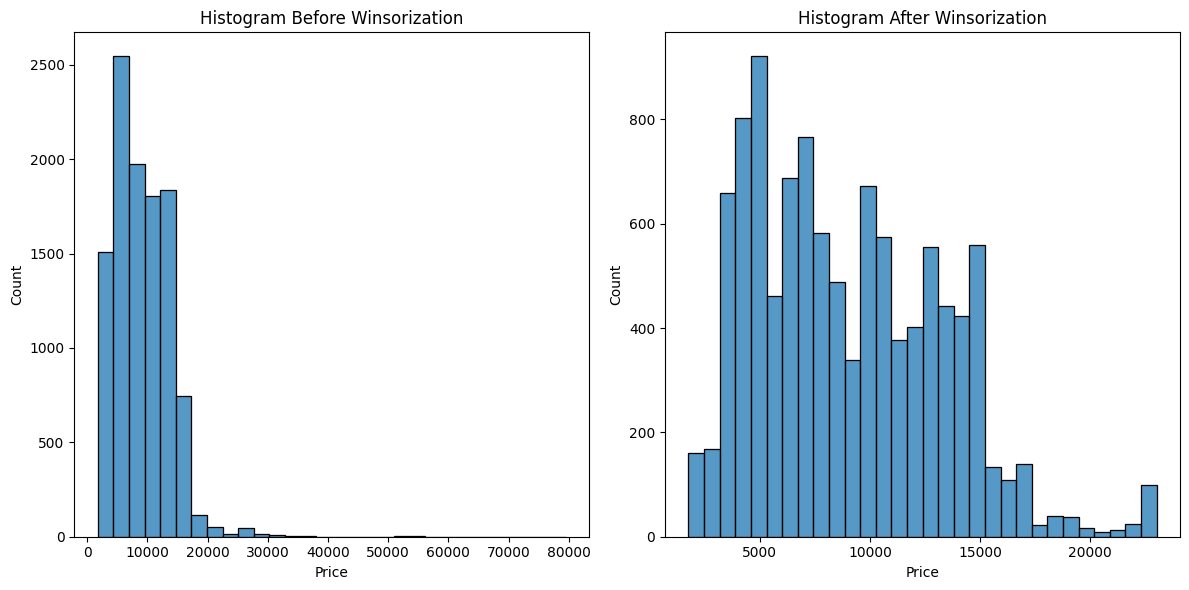

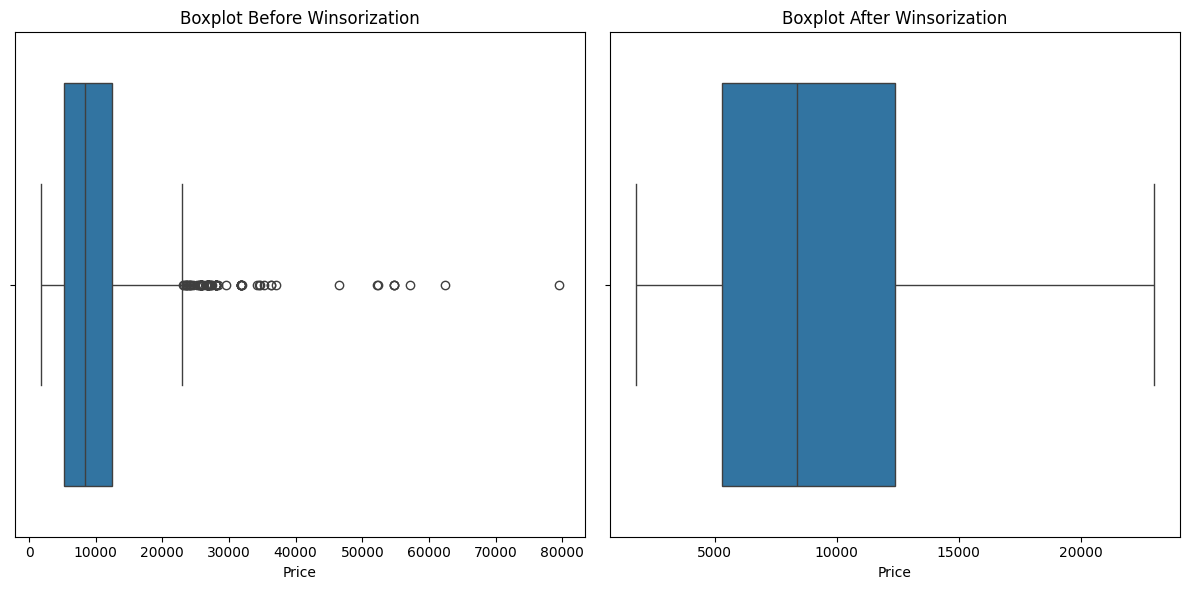

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_outliers = df.copy()

plt.figure(figsize=(15, 10))
for i, col in enumerate(df_outliers.select_dtypes(include=np.number).columns):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df_outliers[col], data=df_outliers)
    plt.title(col)
plt.tight_layout()
plt.show()

Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1

lower_bounds = Q1 - (1.5 * IQR)
upper_bounds = Q3 + (1.5 * IQR)

outliers_count = ((df_outliers < lower_bounds) | (df_outliers > upper_bounds)).sum()
print("\n Outliers Count Per Column:\n", outliers_count)

df_outliers = df_outliers.clip(lower=lower_bounds, upper=upper_bounds, axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(x="Price", data=df, bins=30, ax=axes[0])
axes[0].set_title("Histogram Before Winsorization")

sns.histplot(x="Price", data=df_outliers, bins=30, ax=axes[1])
axes[1].set_title("Histogram After Winsorization")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x="Price", data=df, ax=axes[0])
axes[0].set_title("Boxplot Before Winsorization")

sns.boxplot(x="Price", data=df_outliers, ax=axes[1])
axes[1].set_title("Boxplot After Winsorization")

plt.tight_layout()
plt.show()

df = df_outliers.copy()



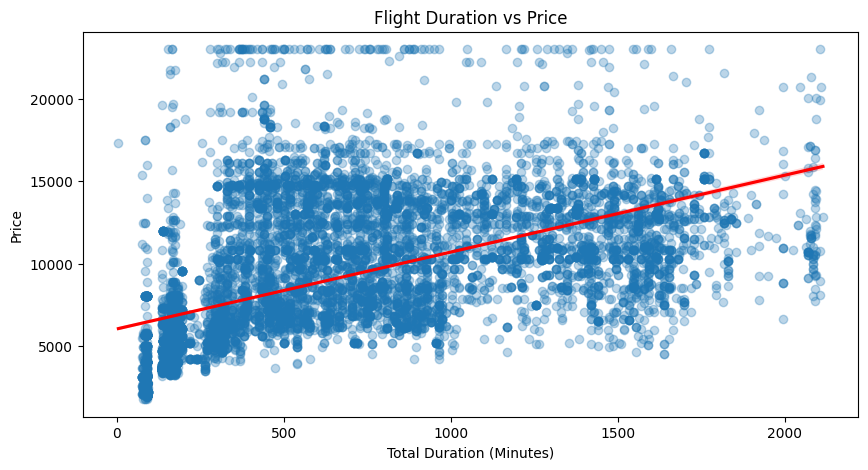

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure total duration in minutes
df["Total_Duration_Minutes"] = df["Duration_hours"] * 60 + df["Duration_mins"]

# Plot Duration vs Price
plt.figure(figsize=(10, 5))
sns.regplot(x=df["Total_Duration_Minutes"], y=df["Price"], scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
plt.title("Flight Duration vs Price")
plt.xlabel("Total Duration (Minutes)")
plt.ylabel("Price")
plt.show()

<ipython-input-20-93f60b52e0b7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Total_Stops_Cat'], palette='coolwarm', order=stops_mapping.values())


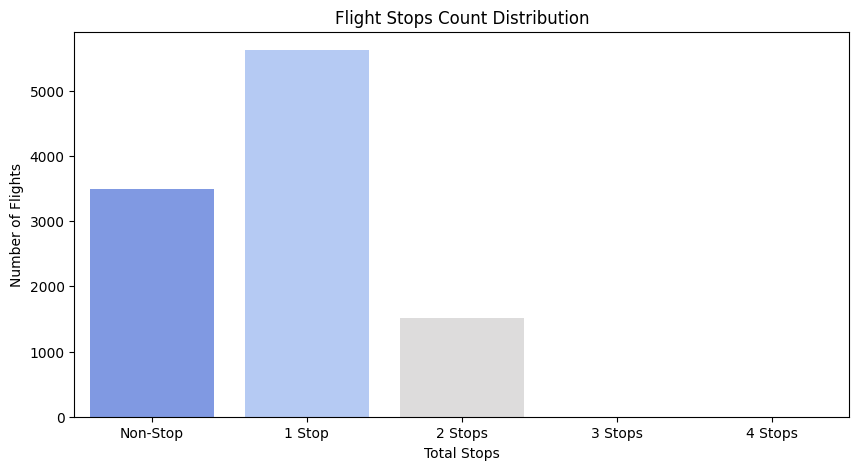

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Define the mapping for Total_Stops
stops_mapping = {0: "Non-Stop", 1: "1 Stop", 2: "2 Stops", 3: "3 Stops", 4: "4 Stops"}

# Convert numerical stops back to categorical labels
df['Total_Stops_Cat'] = df['Total_Stops'].map(stops_mapping)

# Countplot with categorical labels
sns.countplot(x=df['Total_Stops_Cat'], palette='coolwarm', order=stops_mapping.values())

plt.title("Flight Stops Count Distribution")
plt.xlabel("Total Stops")
plt.ylabel("Number of Flights")

plt.show()



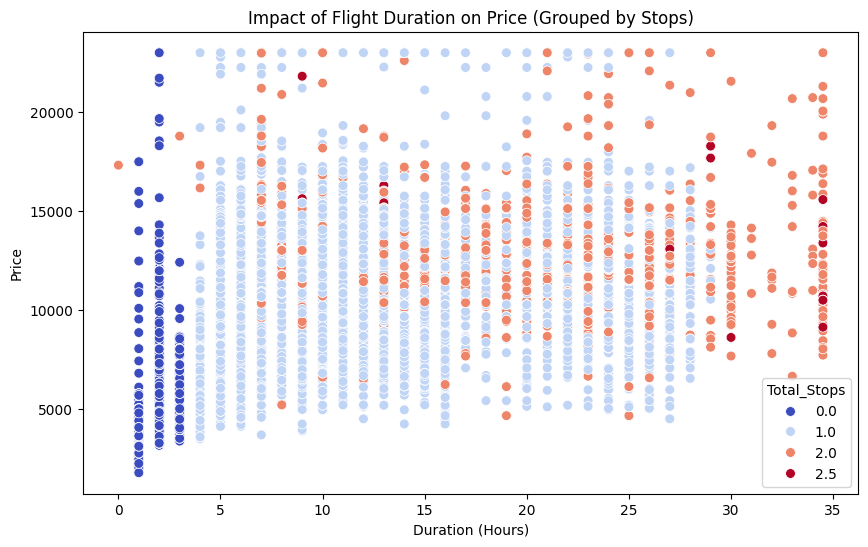

In [ ]:
#whether duration total time impact price or not
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot with hue based on Total_Stops
sns.scatterplot(x="Duration_hours", y="Price", hue="Total_Stops", data=df, palette="coolwarm", s=50)

plt.title("Impact of Flight Duration on Price (Grouped by Stops)")
plt.xlabel("Duration (Hours)")
plt.ylabel("Price")

plt.show()


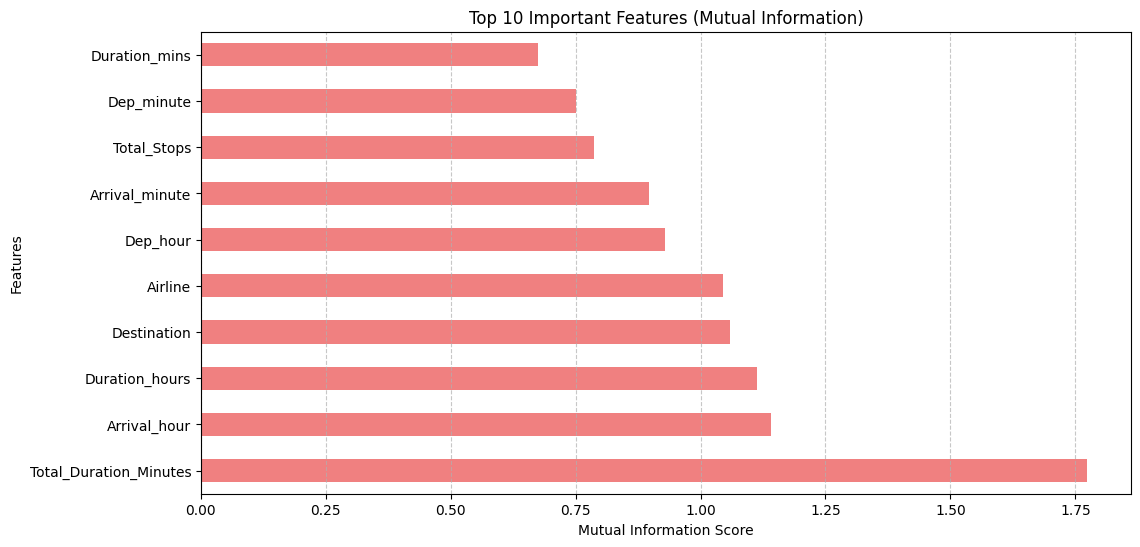

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define Features & Target
X = df_encoded.drop(columns=['Price'])
Y = df_encoded['Price']

# Compute Mutual Information
mi_scores = mutual_info_regression(X, Y)
mi_series = pd.Series(mi_scores, index=X.columns)

# Plot feature importance
plt.figure(figsize=(12, 6))
mi_series.nlargest(10).plot(kind='barh', color='lightcoral')
plt.title("Top 10 Important Features (Mutual Information)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print(df.head())  # Check first few rows
print(df.info())  # Check data types
print(df.isnull().sum())  # Check for missing values


   Airline  Destination  Total_Stops  Price  Journey_day  Journey_month  \
0      3.0            2          0.0   3897           24              3   
1      1.5            0          2.0   7662            1              5   
2      4.0            1          2.0  13882            9              6   
3      3.0            0          1.0   6218           12              5   
4      3.0            2          1.0  13302            1              3   

   Dep_hour  Dep_minute  Arrival_hour  Arrival_minute  Duration_hours  \
0        22          20             1              10             2.0   
1         5          50            13              15             7.0   
2         9          25             4              25            19.0   
3        18           5            23              30             5.0   
4        16          50            21              35             4.0   

   Duration_mins  Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0             50             

In [ ]:
df.drop("Total_Stops_Cat", axis=1, inplace=True)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'Airline' and 'Total_Stops' to integers
df["Airline"] = df["Airline"].astype(int)
df["Total_Stops"] = df["Total_Stops"].astype(int)

# Drop unnecessary column (if needed)
df.drop(columns=["Total_Duration_Minutes"], inplace=True)

# Selecting only necessary features for training
features = [
    "Airline", "Destination", "Total_Stops", "Journey_day", "Journey_month",
    "Dep_hour", "Dep_minute", "Arrival_hour", "Arrival_minute",
    "Duration_hours", "Duration_mins", "Source_Chennai", "Source_Delhi",
    "Source_Kolkata", "Source_Mumbai"
]

x = df[features]
y = df["Price"]

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)

# Scaling (important for models like KNN, Gradient Boosting)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Final X_train shape:", x_train.shape)
print("Final X_test shape:", x_test.shape)
print("Final Y_train shape:", y_train.shape)
print("Final Y_test shape:", y_test.shape)


Final X_train shape: (8546, 15)
Final X_test shape: (2137, 15)
Final Y_train shape: (8546,)
Final Y_test shape: (2137,)


In [ ]:
#1)LGBMRegressor
m1 = LGBMRegressor()
m1.fit(x_train, y_train)
y_pred1 = m1.predict(x_test)
print(f"R2 Score: {r2_score(y_test, y_pred1):.4f}")
y_pred1= m1.predict(x_train)
r2_score(y_train, y_pred1)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 8546, number of used features: 13
[LightGBM] [Info] Start training from score 9047.491341


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


R2 Score: 0.8376


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.8799115162528804

In [ ]:
#2)randomforestregressor
m2= RandomForestRegressor()
m2.fit(x_train, y_train)
y_pred2= m2.predict(x_test)
print(f"R2 Score: {r2_score(y_test, y_pred2):.4f}")

y_pred2= m2.predict(x_train)
r2_score(y_train, y_pred2)

R2 Score: 0.8103


0.9493564341227292

In [ ]:
#3)ExtraTreesRegressor
m3 = ExtraTreesRegressor()
m3.fit(x_train, y_train)
y_pred3 = m3.predict(x_test)
print(f"R2 Score: {r2_score(y_test, y_pred3):.4f}")

R2 Score: 0.7715


In [ ]:
#4) KNeighborsRegressor
m4 = KNeighborsRegressor()
m4.fit(x_train, y_train)
y_pred4 = m4.predict(x_test)
print(f"R2 Score: {r2_score(y_test, y_pred4):.4f}")

R2 Score: 0.7453


In [ ]:
#5)DecisionTreeRegressor
m5 = DecisionTreeRegressor()
m5.fit(x_train, y_train)
y_pred5 = m5.predict(x_test)
print(f"R2 Score: {r2_score(y_test, y_pred5):.4f}")

R2 Score: 0.7121


In [ ]:
#6) GradientBoostingRegressor
m6 = GradientBoostingRegressor()
m6.fit(x_train, y_train)
y_pred6 = m6.predict(x_test)
print(f"R2 Score: {r2_score(y_test, y_pred6):.4f}")

R2 Score: 0.7620


In [ ]:
#7)xgboost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

m7 = XGBRegressor()
m7.fit(x_train, y_train)
y_pred7 = m7.predict(x_test)

print(f"R2 Score: {r2_score(y_test, y_pred7):.4f}")


R2 Score: 0.8484


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

# Initialize model
xgb = XGBRegressor()

# Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best params
best_xgb = XGBRegressor(**grid_search.best_params_)
best_xgb.fit(x_train, y_train)
y_pred_best = best_xgb.predict(x_test)

# Final Accuracy
print(f"R2 Score (After Hyperparameter Tuning): {r2_score(y_test, y_pred_best):.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
R2 Score (After Hyperparameter Tuning): 0.8519


In [ ]:
!pip install xgboost
!pip install lightgbm
!pip install scikit-learn
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd


features = [
    "Airline", "Destination", "Total_Stops", "Journey_day", "Journey_month",
    "Dep_hour", "Dep_minute", "Arrival_hour", "Arrival_minute",
    "Duration_hours", "Duration_mins", "Source_Chennai", "Source_Delhi",
    "Source_Kolkata", "Source_Mumbai"
]

x = df[features]
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)


param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 10, 2),
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0]
}

xgb = XGBRegressor()

random_search = RandomizedSearchCV(xgb, param_distributions=param_dist,
                                   n_iter=20, scoring='r2',
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_xgb = XGBRegressor(**random_search.best_params_)
best_xgb.fit(x_train, y_train)
y_pred_best = best_xgb.predict(x_test)

print(f"R2 Score (After Hyperparameter Tuning): {r2_score(y_test, y_pred_best):.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': np.int64(100), 'max_depth': np.int64(7), 'learning_rate': 0.1, 'colsample_bytree': 0.8}
R2 Score (After Hyperparameter Tuning): 0.8541


In [ ]:
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})

print(comparison_df.head())

      Actual    Predicted
6041    3597  3517.648438
5637    3383  4168.821777
9644    2050  2994.323730
3159    4423  3977.190186
5278    3597  7049.215332


In [ ]:
import pickle

with open("flight_price_model.pkl", "wb") as file:
    pickle.dump(best_xgb, file)

with open("flight_price_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("✅ Model saved and loaded successfully!")


✅ Model saved and loaded successfully!


In [ ]:
# Check feature importance
print("Features used for prediction:", best_xgb.feature_names_in_)


Features used for prediction: ['Airline' 'Destination' 'Total_Stops' 'Journey_day' 'Journey_month'
 'Dep_hour' 'Dep_minute' 'Arrival_hour' 'Arrival_minute' 'Duration_hours'
 'Duration_mins' 'Source_Chennai' 'Source_Delhi' 'Source_Kolkata'
 'Source_Mumbai']


In [ ]:
import pandas as pd

def predict_price(model):
    print("Enter the following details for price prediction:")

    airline = input("Airline: ")
    destination = input("Destination: ")
    total_stops = int(input("Total Stops: "))

    journey_date = input("Journey Date (YYYY-MM-DD): ")
    year, journey_month, journey_day = map(int, journey_date.split("-"))

    dep_time = input("Departure Time (HH:MM): ")
    arrival_time = input("Arrival Time (HH:MM): ")

    dep_hour, dep_minute = map(int, dep_time.split(":"))
    arrival_hour, arrival_minute = map(int, arrival_time.split(":"))

    duration_hours = abs(arrival_hour - dep_hour)
    duration_mins = abs(arrival_minute - dep_minute)

    source_features = ["Source_Chennai", "Source_Delhi", "Source_Kolkata", "Source_Mumbai"]
    source_dict = {feature: 0 for feature in source_features}
    source = input("Source: ")
    source_key = f"Source_{source}"
    if source_key in source_dict:
        source_dict[source_key] = 1

    airline_encoded = df["Airline"].astype("category").cat.categories.tolist().index(airline) if airline in df["Airline"].unique() else 0
    destination_encoded = df["Destination"].astype("category").cat.categories.tolist().index(destination) if destination in df["Destination"].unique() else 0

    input_data = pd.DataFrame([[
        airline_encoded, destination_encoded, total_stops,
        journey_day, journey_month,
        dep_hour, dep_minute, arrival_hour, arrival_minute,
        duration_hours, duration_mins,
        source_dict["Source_Chennai"], source_dict["Source_Delhi"],
        source_dict["Source_Kolkata"], source_dict["Source_Mumbai"]
    ]], columns=[
        "Airline", "Destination", "Total_Stops",
        "Journey_day", "Journey_month",
        "Dep_hour", "Dep_minute", "Arrival_hour", "Arrival_minute",
        "Duration_hours", "Duration_mins",
        "Source_Chennai", "Source_Delhi", "Source_Kolkata", "Source_Mumbai"
    ])


    input_data = input_data.astype(float)

    predicted_price = model.predict(input_data)

    print("\nPredicted Flight Price:", round(predicted_price[0], 2))


predict_price(best_xgb)


Enter the following details for price prediction:
Airline: indigo
Destination: delhi
Total Stops: 2
Journey Date (YYYY-MM-DD): 2025-03-29
Departure Time (HH:MM): 8:30
Arrival Time (HH:MM): 12:30
Source: mumbai

Predicted Flight Price: 8779.77
